In [145]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression

In [100]:
X = np.random.normal(0,1,size=50*500).reshape(50,500)

In [101]:
X.shape

(50, 500)

In [102]:
y = np.random.choice([0,1],size=50)

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

In [169]:
selector = SelectKBest()
selector.fit(X_train,y_train);
np.sort(selector.pvalues_)[:10]

array([ 0.00069437,  0.00228391,  0.00339342,  0.00456976,  0.00683536,
        0.01349855,  0.0151514 ,  0.01959861,  0.02151569,  0.0233616 ])

In [105]:
top_10_inds = np.argsort(selector.pvalues_)[:10]

In [106]:
lgr = LogisticRegression()

In [111]:
cross_val_score(lgr,X_train[:,top_10_inds],y_train,cv=6).mean()

0.94444444444444453

In [112]:
lgr.fit(X_train[:,top_10_inds],y_train)
lgr.score(X_test[:,top_10_inds],y_test)

0.40000000000000002

In [113]:
def run(seed):
    X = np.random.normal(0,1,size=50*500).reshape(50,500)
    y = np.random.choice([0,1],size=50)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)
    selector = SelectKBest(k=5)
    selector.fit(X_train,y_train);
    top_10_inds = np.argsort(selector.pvalues_)[:10]
    val_score = cross_val_score(lgr,X_train[:,top_10_inds],y_train,cv=6).mean()
    lgr.fit(X_train[:,top_10_inds],y_train)
    test_score = lgr.score(X_test[:,top_10_inds],y_test)
    return val_score,test_score

In [136]:
val_scores, test_scores = [],[]
for seed in np.random.choice(range(-9999,9999),replace=False,size=100):
    res = run(seed)
    val_scores.append(res[0])
    test_scores.append(res[1])

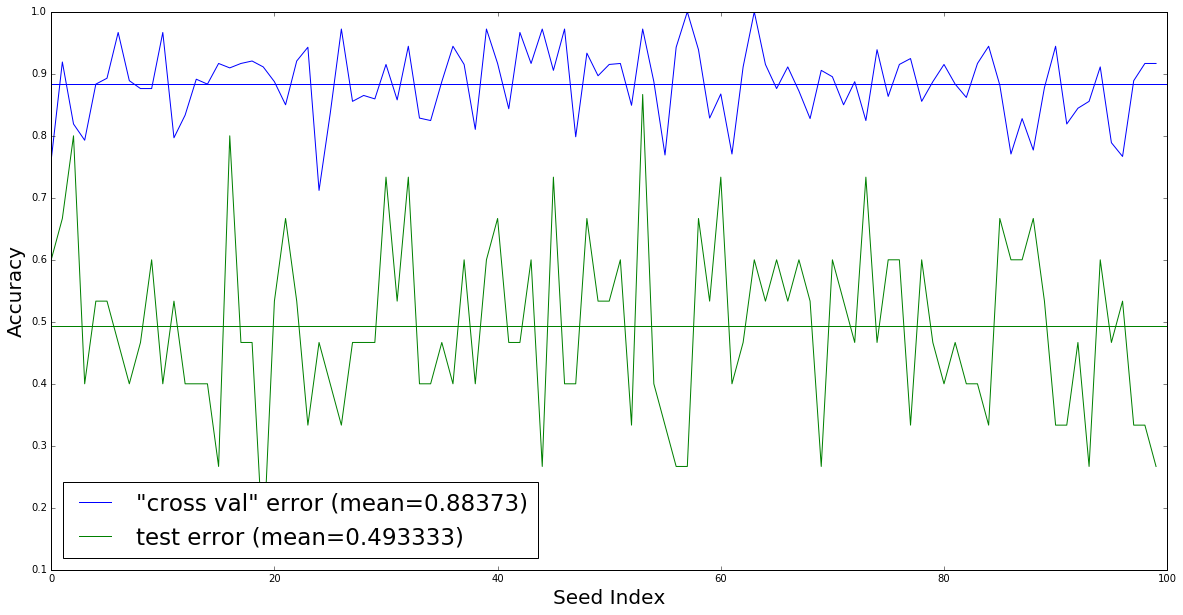

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(20, 10))
plt.plot(val_scores,label = '"cross val" error (mean=%g)' % np.mean(val_scores));
plt.axhline(y=np.mean(val_scores))
plt.plot(test_scores,label = 'test error (mean=%g)' % np.mean(test_scores));
plt.axhline(y=np.mean(test_scores),c='g')
plt.legend(loc=3,prop={'size':23});
plt.xlabel('Seed Index',fontsize=20)
plt.ylabel('Accuracy',fontsize=20);

## What went wrong??

In [166]:
def run(seed):
    ##generate data and split
    X = np.random.normal(0,1,size=50*500).reshape(50,500)
    y = np.random.choice([0,1],size=50)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)
    
    ##cross-validation with feature selection within folds
    kfold = KFold(len(y_train),n_folds=6)
    scores = []
    for train,test in kfold:
        selector.fit(X_train[train],y_train[train]);
        top_10_inds = np.argsort(selector.pvalues_)[:10]
        lgr.fit(X_train[train][:,top_10_inds],y_train[train])
        scores.append(lgr.score(X_train[test][:,top_10_inds],y_train[test]))
    val_score = np.mean(scores)
    
    ##testing
    lgr.fit(X_train[:,top_10_inds],y_train)
    test_score = lgr.score(X_test[:,top_10_inds],y_test)
    return val_score,test_score

In [167]:
val_scores, test_scores = [],[]
for seed in np.random.choice(range(-9999,9999),replace=False,size=100):
    res = run(seed)
    val_scores.append(res[0])
    test_scores.append(res[1])

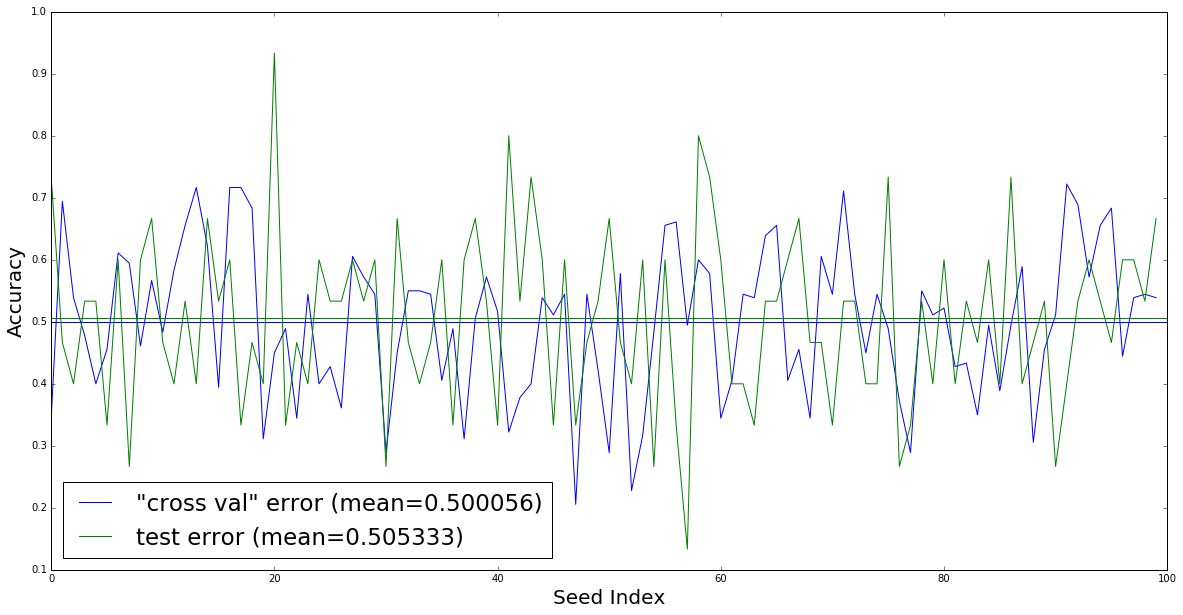

In [168]:
fig,ax = plt.subplots(figsize=(20, 10))
plt.plot(val_scores,label = '"cross val" error (mean=%g)' % np.mean(val_scores));
plt.axhline(y=np.mean(val_scores))
plt.plot(test_scores,label = 'test error (mean=%g)' % np.mean(test_scores));
plt.axhline(y=np.mean(test_scores),c='g')
plt.legend(loc=3,prop={'size':23});
plt.xlabel('Seed Index',fontsize=20)
plt.ylabel('Accuracy',fontsize=20);